In [1]:
# importing the required libraries
import numpy as np
import pandas as pd
from datetime import datetime as dt
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima_model import ARIMA
import math
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15,6

import warnings
warnings.filterwarnings('ignore')

# Perform exploratory data analysis

In [2]:
data = pd.read_csv(r"C:\Users\USER\Downloads\AirPassengers.csv")

In [3]:
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
data["Month"].head()

0    1949-01
1    1949-02
2    1949-03
3    1949-04
4    1949-05
Name: Month, dtype: object

In [5]:
# data['Month']=data['Month'].apply(lambda x: dt(int(x[:4]),int(x[5:]),15))
data = data.set_index('Month') # plot setting the index to month
data.head()

,#Passengers
Month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121


In [6]:
ts = data['#Passengers']

In [7]:
ts

Month
1949-01    112
1949-02    118
1949-03    132
1949-04    129
1949-05    121
          ... 
1960-08    606
1960-09    508
1960-10    461
1960-11    390
1960-12    432
Name: #Passengers, Length: 144, dtype: int64

In [10]:
ts.shape

(144,)

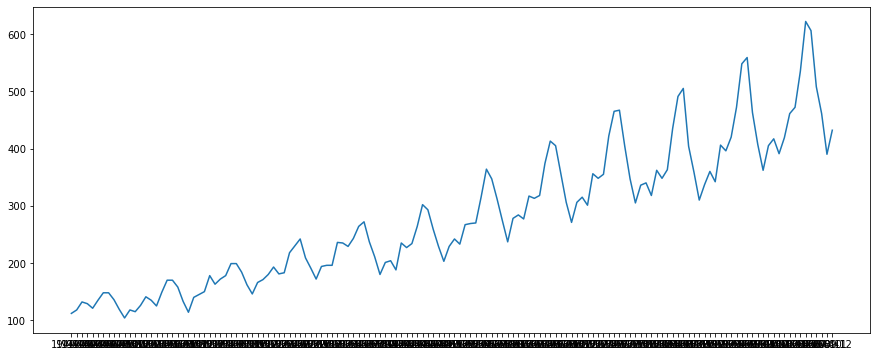

In [8]:
plt.plot(ts)

# PERFORM DECOMPOSITION OF DATA

In [9]:
# tranforming series using Log D decomposition
ts_log = np.log(ts)

# Perform stationarity check

In [11]:
# stationarity check
def test_stationarity(timeseries): 
    rolmean = timeseries.rolling(window=52,center=False).mean() # calculating the rolling mean
    rolstd = timeseries.rolling(window=52,center=False).std()
    
#     calculate the rolling statistics
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red',label='Rolling Mean')
    std = plt.plot(rolstd, color='black',label='Rolling std')
    plt.legend(loc='best')
    plt.title("Rolling Mean & Standarrd Deviation")
    plt.show(block=False)
    
#     lets perform the Dickey fully test
    print('Results of Dickey-Fuller Test:')
#     initializing the dftest variable
    dftest = adfuller(timeseries,autolag='AIC')
#     initailizing the output with the test statistic P value and other required variables
    dfoutput = pd.Series(dftest[0:4],index=['Test statistic','p-value', '#lags used','Number of observation used'])

    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

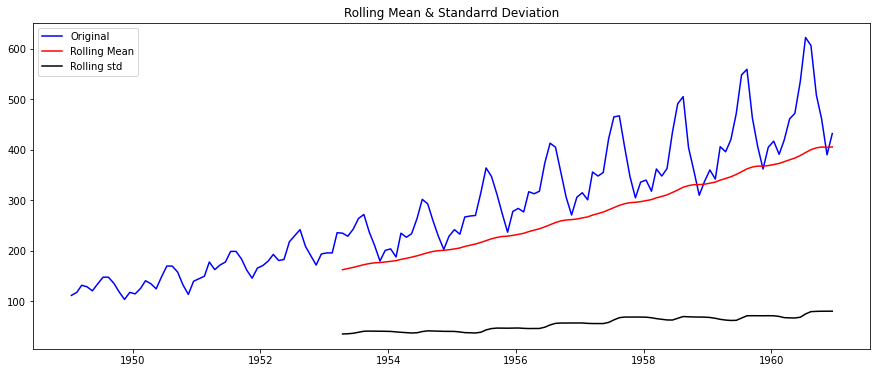

Results of Dickey-Fuller Test:
Test statistic                  0.815369
p-value                         0.991880
#lags used                     13.000000
Number of observation used    130.000000
Critical Value (1%)            -3.481682
Critical Value (5%)            -2.884042
Critical Value (10%)           -2.578770
dtype: float64


In [25]:
# now lets apply the data to the function and see the result for stationarity
test_stationarity(data['#Passengers'])

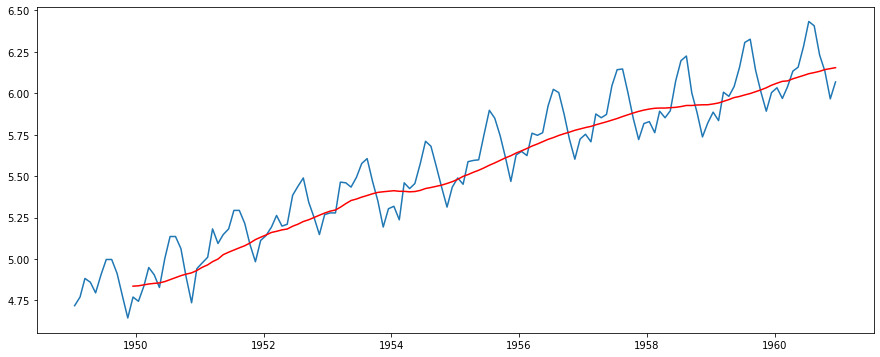

In [27]:
# Deomposing the data, lets plot the moving average
movingAverage = ts_log.rolling(window=12).mean()
movingSTD = ts_log.rolling(window=12).std()
plt.plot(ts_log) #plotting the data
plt.plot(movingAverage, color='red') #plotting the moving average

In [28]:
# lets write the code fro th same
ts_log_mv_diff = ts_log - movingAverage
# printing the first 12 values
ts_log_mv_diff.head(12)

# lets drop the null values from the timeseries data
ts_log_mv_diff.dropna(inplace=True)
ts_log_mv_diff.head(10)

Month
1949-12-15   -0.065494
1950-01-15   -0.093449
1950-02-15   -0.007566
1950-03-15    0.099416
1950-04-15    0.052142
1950-05-15   -0.027529
1950-06-15    0.139881
1950-07-15    0.260184
1950-08-15    0.248635
1950-09-15    0.162937
Name: #Passengers, dtype: float64

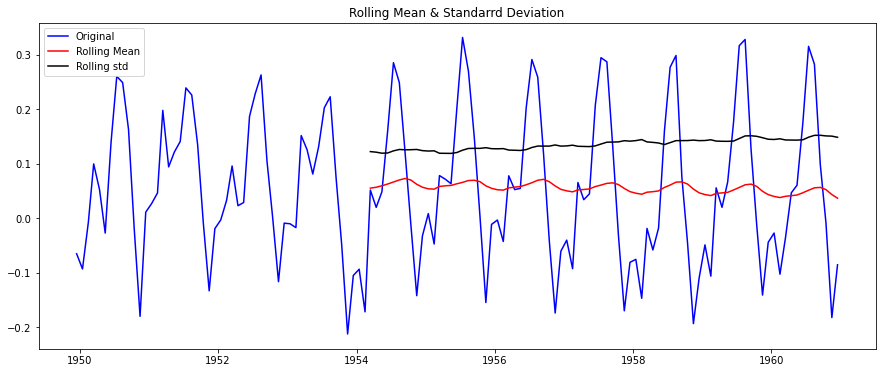

Results of Dickey-Fuller Test:
Test statistic                 -3.162908
p-value                         0.022235
#lags used                     13.000000
Number of observation used    119.000000
Critical Value (1%)            -3.486535
Critical Value (5%)            -2.886151
Critical Value (10%)           -2.579896
dtype: float64


In [29]:
# Now lets parse our time series data into this funtion and check for stationarity
test_stationarity(ts_log_mv_diff)

the result of the Dickey fuller test show that the test statistic is less than 1% of ritial value, that tells us that we are 99%
confident that this series is stationary. we an reject the null hypothesis

# plotting the ACf